# Sleep Preprocessing

Model 1A: Sleep Quality Scorer
Model 1B: Sleep Stage Classifier
Output: data/processed/sleep_processed.csv


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


Libraries imported successfully!


## Load Data


In [ ]:
sleep1 = pd.read_csv('../data/sleep.csv', delimiter=';')
print(f"Sleep1 shape: {sleep1.shape}")
sleep1.head()


Sleep 1 Dataset Shape: (887, 8)

First few rows:


,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [ ]:
sleep2 = pd.read_csv('../data/sleep2.csv', delimiter=';')
print(f"Sleep2 shape: {sleep2.shape}")
sleep2.head()


Sleep 2 Dataset Shape: (921, 21)

First few rows:


,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,35.0,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,78.6,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,60.5,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,45.2,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,44.6,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


## EDA


In [ ]:
sleep1.info()
print(sleep1.isnull().sum())
sleep2.info()
print(sleep2.isnull().sum())

SLEEP 1 DATASET

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB
None

Missing Values:
Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

Data Types:
Start                object
End                  object
Sleep quality        object
Ti

## Process Sleep1


In [ ]:
df_sleep1 = sleep1.copy()
df_sleep1['Start'] = pd.to_datetime(df_sleep1['Start'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_sleep1['End'] = pd.to_datetime(df_sleep1['End'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_sleep1['sleep_quality_score'] = df_sleep1['Sleep quality'].str.replace('%', '').astype(float)

def parse_time_in_bed(time_str):
    if pd.isna(time_str):
        return np.nan
    try:
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        return hours + minutes / 60.0
    except:
        return np.nan

df_sleep1['time_in_bed_hours'] = df_sleep1['Time in bed'].apply(parse_time_in_bed)
df_sleep1['sleep_duration_hours'] = (df_sleep1['End'] - df_sleep1['Start']).dt.total_seconds() / 3600
mood_mapping = {':)': 1, ':|': 0, ':(': -1}
df_sleep1['wake_up_mood'] = df_sleep1['Wake up'].map(mood_mapping)
df_sleep1['sleep_date'] = df_sleep1['Start'].dt.date
df_sleep1['day_of_week'] = df_sleep1['Start'].dt.dayofweek
df_sleep1['month'] = df_sleep1['Start'].dt.month
df_sleep1['hour_started'] = df_sleep1['Start'].dt.hour
df_sleep1['note_coffee'] = df_sleep1['Sleep Notes'].fillna('').str.contains('coffee', case=False).astype(int)
df_sleep1['note_tea'] = df_sleep1['Sleep Notes'].fillna('').str.contains('tea', case=False).astype(int)
df_sleep1['note_workout'] = df_sleep1['Sleep Notes'].fillna('').str.contains('work', case=False).astype(int)
df_sleep1['note_stress'] = df_sleep1['Sleep Notes'].fillna('').str.contains('stress', case=False).astype(int)
df_sleep1['note_ate_late'] = df_sleep1['Sleep Notes'].fillna('').str.contains('ate late', case=False).astype(int)
df_sleep1['Heart rate'] = pd.to_numeric(df_sleep1['Heart rate'], errors='coerce')
df_sleep1['Activity (steps)'] = pd.to_numeric(df_sleep1['Activity (steps)'], errors='coerce')
df_sleep1['data_source'] = 'sleep1'
print(f"Sleep1 processed: {df_sleep1.shape}")

Sleep 1 preprocessing complete!
Shape: (887, 22)

Processed columns: ['Start', 'End', 'Sleep quality', 'Time in bed', 'Wake up', 'Sleep Notes', 'Heart rate', 'Activity (steps)', 'sleep_quality_score', 'time_in_bed_hours', 'sleep_duration_hours', 'wake_up_mood', 'sleep_date', 'day_of_week', 'month', 'hour_started', 'note_coffee', 'note_tea', 'note_workout', 'note_stress', 'note_ate_late', 'data_source']


## Process Sleep2


In [ ]:

df_sleep2 = sleep2.copy()

df_sleep2['Start'] = pd.to_datetime(df_sleep2['Start'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_sleep2['End'] = pd.to_datetime(df_sleep2['End'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_sleep2['sleep_quality_score'] = df_sleep2['Sleep Quality'].str.replace('%', '').astype(float)
df_sleep2['sleep_regularity'] = df_sleep2['Regularity'].str.replace('%', '').astype(float)
df_sleep2['time_in_bed_hours'] = pd.to_numeric(df_sleep2['Time in bed (seconds)'], errors='coerce') / 3600
df_sleep2['time_asleep_hours'] = pd.to_numeric(df_sleep2['Time asleep (seconds)'], errors='coerce') / 3600
df_sleep2['time_before_sleep_minutes'] = pd.to_numeric(df_sleep2['Time before sleep (seconds)'], errors='coerce') / 60
df_sleep2['sleep_duration_hours'] = (df_sleep2['End'] - df_sleep2['Start']).dt.total_seconds() / 3600
df_sleep2['movements_per_hour'] = pd.to_numeric(df_sleep2['Movements per hour'], errors='coerce')
df_sleep2['snore_time'] = pd.to_numeric(df_sleep2['Snore time'], errors='coerce')
df_sleep2['air_pressure'] = pd.to_numeric(df_sleep2['Air Pressure (Pa)'], errors='coerce')
df_sleep2['weather_temp'] = pd.to_numeric(df_sleep2['Weather temperature (°C)'], errors='coerce')
df_sleep2['did_snore'] = df_sleep2['Did snore'].map({'true': 1, 'false': 0, True: 1, False: 0})
df_sleep2['alarm_mode'] = df_sleep2['Alarm mode']
df_sleep2['city'] = df_sleep2['City']
df_sleep2['weather_type'] = df_sleep2['Weather type']
df_sleep2['sleep_date'] = df_sleep2['Start'].dt.date
df_sleep2['day_of_week'] = df_sleep2['Start'].dt.dayofweek
df_sleep2['month'] = df_sleep2['Start'].dt.month
df_sleep2['hour_started'] = df_sleep2['Start'].dt.hour
df_sleep2['has_notes'] = (~df_sleep2['Notes'].isna()).astype(int)
df_sleep2['steps'] = pd.to_numeric(df_sleep2['Steps'], errors='coerce')
df_sleep2['heart_rate'] = pd.to_numeric(df_sleep2['Heart rate (bpm)'], errors='coerce')
df_sleep2['sleep_efficiency'] = (df_sleep2['time_asleep_hours'] / df_sleep2['time_in_bed_hours'] * 100).clip(0, 100)
df_sleep2['data_source'] = 'sleep2'

print(f"Sleep2 processed: {df_sleep2.shape}")
df_sleep2[['sleep_quality_score', 'sleep_regularity', 'time_in_bed_hours', 'sleep_efficiency', 'movements_per_hour']].head()

Sleep 2 preprocessing complete!
Shape: (921, 44)

Sample of processed data:


,sleep_quality_score,sleep_regularity,time_in_bed_hours,sleep_efficiency,movements_per_hour
0,60.0,0.0,6.747000,94.666765,35.0
1,73.0,0.0,8.002833,87.333306,78.6
2,86.0,96.0,8.461528,93.333552,60.5
3,77.0,92.0,7.035444,91.333170,45.2
4,78.0,94.0,7.138444,88.000031,44.6


## Merge Datasets


In [ ]:
sleep1_features = df_sleep1[[
    'sleep_date', 'day_of_week', 'month', 'hour_started',
    'sleep_quality_score', 'time_in_bed_hours', 'sleep_duration_hours',
    'wake_up_mood', 'Heart rate', 'Activity (steps)',
    'note_coffee', 'note_tea', 'note_workout', 'note_stress', 'note_ate_late',
    'data_source'
]].copy()

sleep1_features.rename(columns={
    'Heart rate': 'heart_rate',
    'Activity (steps)': 'steps'
}, inplace=True)

sleep1_features['sleep_regularity'] = np.nan
sleep1_features['time_asleep_hours'] = np.nan
sleep1_features['time_before_sleep_minutes'] = np.nan
sleep1_features['movements_per_hour'] = np.nan
sleep1_features['snore_time'] = np.nan
sleep1_features['did_snore'] = np.nan
sleep1_features['sleep_efficiency'] = np.nan

print(f"Sleep1 features: {sleep1_features.shape}")
sleep1_features.head()


Sleep 1 features prepared!
Shape: (887, 23)


,sleep_date,day_of_week,month,hour_started,sleep_quality_score,time_in_bed_hours,sleep_duration_hours,wake_up_mood,heart_rate,steps,note_coffee,note_tea,note_workout,note_stress,note_ate_late,data_source,sleep_regularity,time_asleep_hours,time_before_sleep_minutes,movements_per_hour,snore_time,did_snore,sleep_efficiency
0,2014-12-29,0,12,22,100.0,8.533333,8.540000,1.0,59.0,0,0,0,0,0,0,sleep1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-30,1,12,21,3.0,0.266667,0.267778,0.0,72.0,0,0,0,0,1,0,sleep1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-30,1,12,22,98.0,8.500000,8.511667,0.0,57.0,0,0,0,0,0,0,sleep1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-31,2,12,22,65.0,7.533333,7.533333,NaN,NaN,0,0,0,0,0,0,sleep1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,3,1,22,72.0,6.733333,6.740278,1.0,68.0,0,1,1,0,0,0,sleep1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sleep2_features = df_sleep2[[
    'sleep_date', 'day_of_week', 'month', 'hour_started',
    'sleep_quality_score', 'time_in_bed_hours', 'sleep_duration_hours',
    'heart_rate', 'steps',
    'sleep_regularity', 'time_asleep_hours', 'time_before_sleep_minutes',
    'movements_per_hour', 'snore_time', 'did_snore', 'sleep_efficiency',
    'data_source'
]].copy()

sleep2_features['wake_up_mood'] = np.nan
sleep2_features['note_coffee'] = 0
sleep2_features['note_tea'] = 0
sleep2_features['note_workout'] = 0
sleep2_features['note_stress'] = 0
sleep2_features['note_ate_late'] = 0

print(f"Sleep2 features: {sleep2_features.shape}")
sleep2_features.head()


Sleep 2 features prepared!
Shape: (921, 23)


,sleep_date,day_of_week,month,hour_started,sleep_quality_score,time_in_bed_hours,sleep_duration_hours,heart_rate,steps,sleep_regularity,time_asleep_hours,time_before_sleep_minutes,movements_per_hour,snore_time,did_snore,sleep_efficiency,data_source,wake_up_mood,note_coffee,note_tea,note_workout,note_stress,note_ate_late
0,2019-05-12,6,5,23,60.0,6.747000,6.747222,0,8350,0.0,6.387167,2.698333,35.0,92.0,1,94.666765,sleep2,NaN,0,0,0,0,0
1,2019-05-13,0,5,22,73.0,8.002833,8.003056,0,4746,0.0,6.989139,3.201667,78.6,0.0,1,87.333306,sleep2,NaN,0,0,0,0,0
2,2019-05-14,1,5,21,86.0,8.461528,8.461389,0,4007,96.0,7.897444,3.385000,60.5,74.0,1,93.333552,sleep2,NaN,0,0,0,0,0
3,2019-05-15,2,5,23,77.0,7.035444,7.035556,0,6578,92.0,6.425694,2.815000,45.2,0.0,1,91.333170,sleep2,NaN,0,0,0,0,0
4,2019-05-16,3,5,23,78.0,7.138444,7.138611,0,4913,94.0,6.281833,2.855000,44.6,188.0,1,88.000031,sleep2,NaN,0,0,0,0,0


In [ ]:
df_combined = pd.concat([sleep1_features, sleep2_features], axis=0, ignore_index=True)
print(f"Combined: {df_combined.shape}")
print(df_combined['data_source'].value_counts())
print(df_combined.isnull().sum().sort_values(ascending=False))


Combined dataset shape: (1808, 23)

Data source distribution:
data_source
sleep2    921
sleep1    887
Name: count, dtype: int64

Missing values in combined dataset:
wake_up_mood                 1562
sleep_efficiency              887
did_snore                     887
snore_time                    887
movements_per_hour            887
time_before_sleep_minutes     887
time_asleep_hours             887
sleep_regularity              887
heart_rate                    725
note_stress                     0
data_source                     0
note_ate_late                   0
sleep_date                      0
note_workout                    0
day_of_week                     0
note_coffee                     0
steps                           0
sleep_duration_hours            0
time_in_bed_hours               0
sleep_quality_score             0
hour_started                    0
month                           0
note_tea                        0
dtype: int64


## Handle Missing Values


In [ ]:
df_processed = df_combined.copy()
df_processed['heart_rate'] = df_processed['heart_rate'].fillna(df_processed['heart_rate'].median())
df_processed['wake_up_mood'] = df_processed['wake_up_mood'].fillna(-999)
df_processed['time_asleep_hours'] = df_processed['time_asleep_hours'].fillna(
    df_processed['sleep_duration_hours'] * 0.85
)
df_processed['sleep_regularity'] = df_processed['sleep_regularity'].fillna(
    df_processed['sleep_regularity'].median()
)
df_processed['time_before_sleep_minutes'] = df_processed['time_before_sleep_minutes'].fillna(
    df_processed['time_before_sleep_minutes'].median()
)
df_processed['movements_per_hour'] = df_processed['movements_per_hour'].fillna(
    df_processed['movements_per_hour'].median()
)
df_processed['snore_time'] = df_processed['snore_time'].fillna(0)
df_processed['did_snore'] = df_processed['did_snore'].fillna(0)
df_processed['sleep_efficiency'] = df_processed['sleep_efficiency'].fillna(
    (df_processed['time_asleep_hours'] / df_processed['time_in_bed_hours'] * 100).clip(0, 100)
)
print(df_processed['sleep_quality_score'].describe())
df_processed = df_processed[
    (df_processed['sleep_quality_score'] >= 0) & 
    (df_processed['sleep_quality_score'] <= 100)
]
print(df_processed['sleep_duration_hours'].describe())
df_processed = df_processed[
    (df_processed['sleep_duration_hours'] >= 1) & 
    (df_processed['sleep_duration_hours'] <= 16)
]
print(f"Cleaned: {df_processed.shape}, Missing: {df_processed.isnull().sum().sum()}")


Sleep quality score distribution:
count    1808.000000
mean       76.426991
std        14.255561
min         0.000000
25%        70.000000
50%        78.000000
75%        85.000000
max       100.000000
Name: sleep_quality_score, dtype: float64

Sleep duration distribution:
count    1808.000000
mean        7.645279
std         1.190606
min         0.251389
25%         7.198611
50%         7.694028
75%         8.204097
max        12.973056
Name: sleep_duration_hours, dtype: float64

Processed dataset shape after cleaning: (1793, 23)

Remaining missing values:
Series([], dtype: int64)


## 8. Feature Engineering


In [ ]:
df_processed['is_weekend'] = df_processed['day_of_week'].isin([5, 6]).astype(int)
df_processed['is_late_start'] = (df_processed['hour_started'] >= 23).astype(int)
df_processed['is_early_start'] = (df_processed['hour_started'] <= 21).astype(int)
df_processed['is_good_sleep'] = (df_processed['sleep_quality_score'] >= 80).astype(int)
df_processed['is_poor_sleep'] = (df_processed['sleep_quality_score'] < 50).astype(int)
df_processed['efficiency_category'] = pd.cut(
    df_processed['sleep_efficiency'], 
    bins=[0, 70, 85, 95, 100], 
    labels=['poor', 'fair', 'good', 'excellent']
)
df_processed['duration_category'] = pd.cut(
    df_processed['sleep_duration_hours'], 
    bins=[0, 5, 7, 9, 20], 
    labels=['short', 'moderate', 'optimal', 'long']
)
df_processed['movement_intensity'] = pd.cut(
    df_processed['movements_per_hour'], 
    bins=[-1, 40, 60, 100], 
    labels=['low', 'moderate', 'high']
)
df_processed['lifestyle_factor_count'] = (
    df_processed['note_coffee'] + 
    df_processed['note_tea'] + 
    df_processed['note_workout'] + 
    df_processed['note_stress'] + 
    df_processed['note_ate_late']
)
df_processed['sleep_debt'] = 8 - df_processed['sleep_duration_hours']
df_processed['restlessness_score'] = (
    df_processed['movements_per_hour'] * 0.5 + 
    df_processed['snore_time'] * 0.05
)

print(f"Features: {df_processed.shape[1]}")
new_features = ['is_weekend', 'is_late_start', 'is_early_start', 'is_good_sleep', 
                'is_poor_sleep', 'efficiency_category', 'duration_category', 
                'movement_intensity', 'lifestyle_factor_count', 'sleep_debt', 'restlessness_score']
df_processed[new_features].head(10)


Feature engineering complete!

New features created:
  - is_weekend
  - is_late_start
  - is_early_start
  - is_good_sleep
  - is_poor_sleep
  - efficiency_category
  - duration_category
  - movement_intensity
  - lifestyle_factor_count
  - sleep_debt
  - restlessness_score


,is_weekend,is_late_start,is_early_start,is_good_sleep,is_poor_sleep,efficiency_category,duration_category,movement_intensity,lifestyle_factor_count,sleep_debt,restlessness_score
0,0,0,0,1,0,good,optimal,moderate,0,-0.540000,24.8
2,0,0,0,1,0,good,optimal,moderate,0,-0.511667,24.8
3,0,0,0,0,0,fair,optimal,moderate,0,0.466667,24.8
4,0,0,0,0,0,good,moderate,moderate,2,1.259722,24.8
5,1,0,1,1,0,good,optimal,moderate,2,0.792778,24.8
6,1,0,1,0,0,good,optimal,moderate,1,0.765833,24.8
7,1,0,1,0,0,good,optimal,moderate,2,0.686111,24.8
8,0,0,1,0,0,good,optimal,moderate,3,0.539444,24.8
9,0,0,1,0,0,good,optimal,moderate,2,0.415000,24.8
10,0,0,1,1,0,good,long,moderate,3,-1.322778,24.8


## Target Variables


TARGET 1: sleep_quality_score (Regression)
count    1793.000000
mean       77.000558
std        12.852420
min         0.000000
25%        70.000000
50%        78.000000
75%        85.000000
max       100.000000
Name: sleep_quality_score, dtype: float64

Distribution:
(-0.101, 20.0]      9
(20.0, 40.0]       22
(40.0, 60.0]      122
(60.0, 80.0]      925
(80.0, 100.0]     715
Name: count, dtype: int64

TARGET 2: sleep_stage (Classification)
sleep_stage
light       1355
restless     231
rem          138
deep          69
Name: count, dtype: int64

Percentage distribution:
sleep_stage
light       75.571668
restless    12.883436
rem          7.696598
deep         3.848299
Name: proportion, dtype: float64


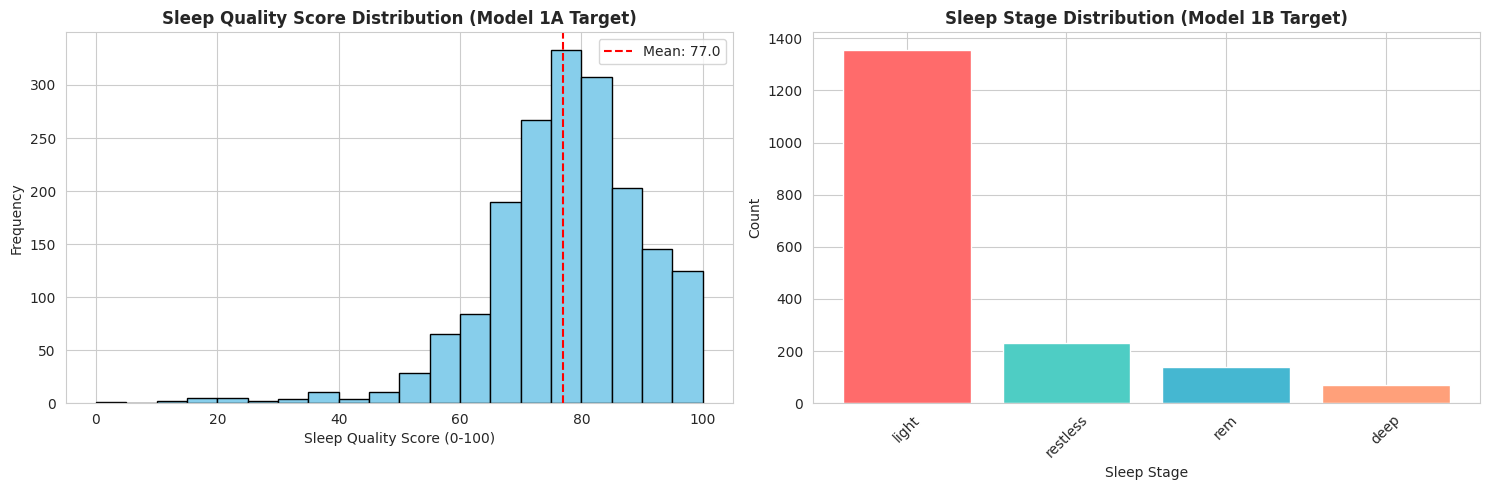


Target variables created successfully!


In [ ]:
print(df_processed['sleep_quality_score'].describe())

def classify_sleep_stage(row):
    quality = row['sleep_quality_score']
    efficiency = row['sleep_efficiency']
    movements = row['movements_per_hour']
    duration = row['sleep_duration_hours']
    if quality >= 85 and efficiency >= 90 and movements < 40:
        return 'deep'
    elif quality < 50 or movements > 70 or efficiency < 70:
        return 'restless'
    elif quality >= 75 and 50 <= movements <= 80 and 6 <= duration <= 9:
        return 'rem'
    else:
        return 'light'

df_processed['sleep_stage'] = df_processed.apply(classify_sleep_stage, axis=1)
print(df_processed['sleep_stage'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(df_processed['sleep_quality_score'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_title('Sleep Quality Score Distribution (Model 1A Target)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sleep Quality Score (0-100)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_processed['sleep_quality_score'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df_processed["sleep_quality_score"].mean():.1f}')
axes[0].legend()

sleep_stage_counts = df_processed['sleep_stage'].value_counts()
axes[1].bar(sleep_stage_counts.index, sleep_stage_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1].set_title('Sleep Stage Distribution (Model 1B Target)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sleep Stage')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation


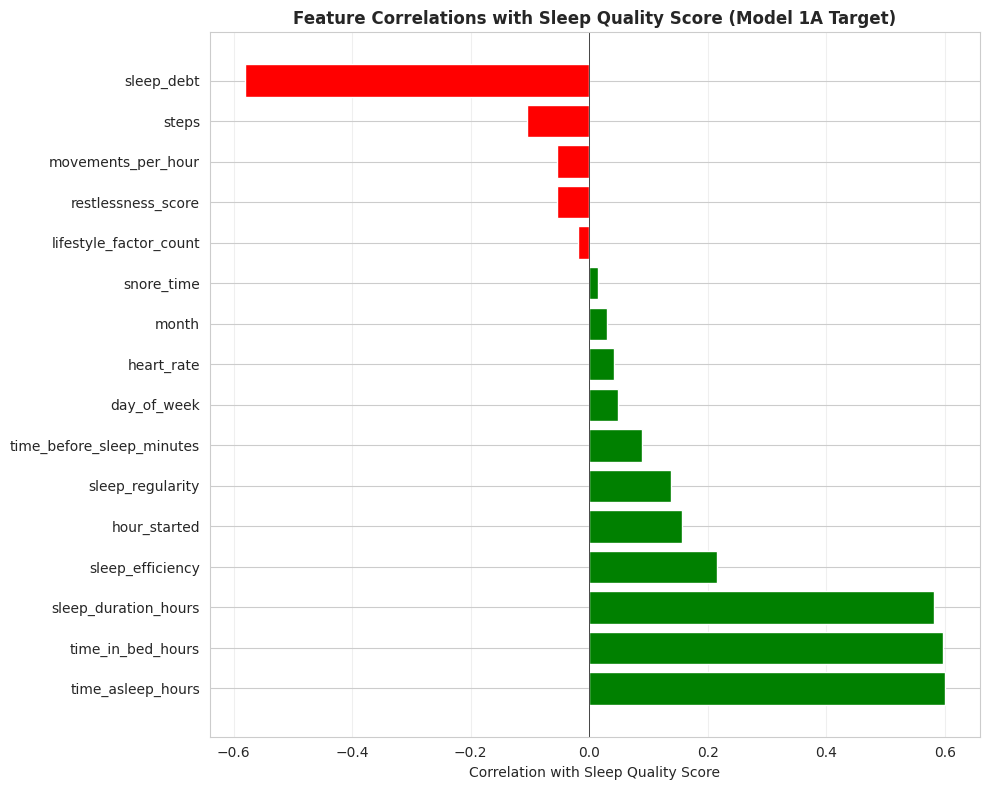

Top 10 features correlated with Sleep Quality Score:
time_asleep_hours            0.600232
time_in_bed_hours            0.596688
sleep_duration_hours         0.581207
sleep_efficiency             0.215334
hour_started                 0.156799
sleep_regularity             0.137837
time_before_sleep_minutes    0.088178
day_of_week                  0.048622
heart_rate                   0.042384
month                        0.030313
Name: sleep_quality_score, dtype: float64


In [ ]:
numerical_features = [
    'sleep_quality_score', 'time_in_bed_hours', 'sleep_duration_hours',
    'heart_rate', 'steps', 'sleep_regularity', 'time_asleep_hours',
    'time_before_sleep_minutes', 'movements_per_hour', 'snore_time',
    'sleep_efficiency', 'lifestyle_factor_count', 'sleep_debt', 'restlessness_score',
    'day_of_week', 'month', 'hour_started'
]

correlation_matrix = df_processed[numerical_features].corr()
plt.figure(figsize=(10, 8))
correlations_with_target = correlation_matrix['sleep_quality_score'].sort_values(ascending=False)
correlations_with_target = correlations_with_target.drop('sleep_quality_score')

plt.barh(range(len(correlations_with_target)), correlations_with_target.values, 
         color=['green' if x > 0 else 'red' for x in correlations_with_target.values])
plt.yticks(range(len(correlations_with_target)), correlations_with_target.index)
plt.xlabel('Correlation with Sleep Quality Score')
plt.title('Feature Correlations with Sleep Quality Score (Model 1A Target)', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(correlations_with_target.head(10))


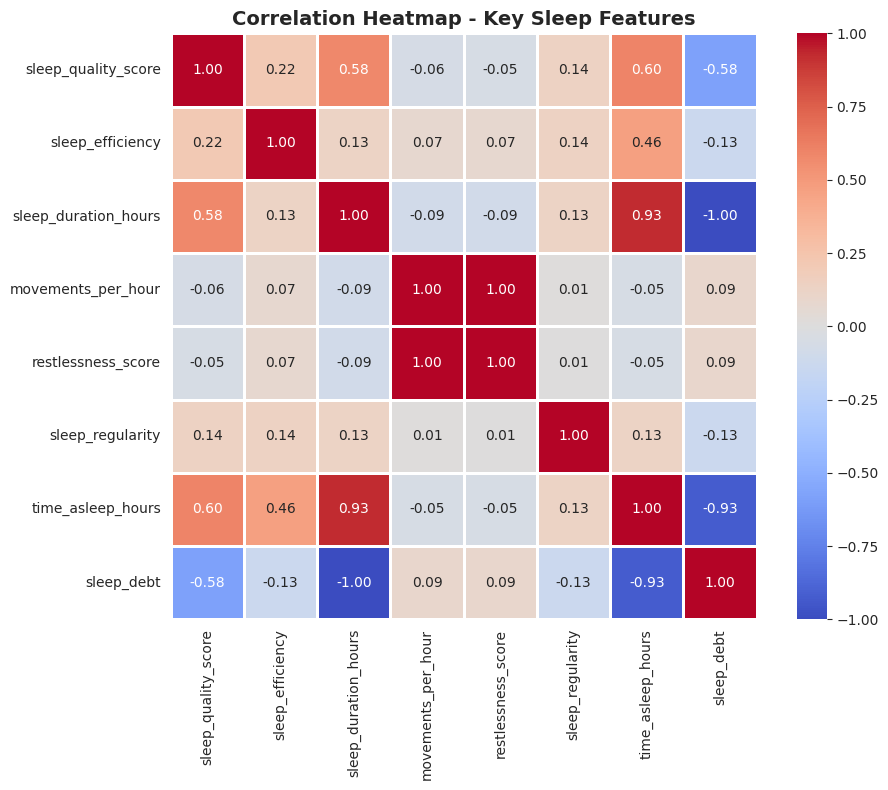

In [ ]:
key_features = [
    'sleep_quality_score', 'sleep_efficiency', 'sleep_duration_hours', 
    'movements_per_hour', 'restlessness_score', 'sleep_regularity',
    'time_asleep_hours', 'sleep_debt'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df_processed[key_features].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Key Sleep Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


## Normalize Features


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_final = df_processed.copy()
features_to_standardize = [
    'time_in_bed_hours', 'sleep_duration_hours', 'heart_rate', 'steps',
    'sleep_regularity', 'time_asleep_hours', 'time_before_sleep_minutes',
    'movements_per_hour', 'snore_time', 'sleep_efficiency', 
    'lifestyle_factor_count', 'sleep_debt', 'restlessness_score'
]

scaler = StandardScaler()
for feature in features_to_standardize:
    df_final[f'{feature}_scaled'] = scaler.fit_transform(df_final[[feature]])

comparison_df = pd.DataFrame({
    'Original': df_final['sleep_duration_hours'].head(10),
    'Scaled': df_final['sleep_duration_hours_scaled'].head(10)
})
print(comparison_df)

label_encoder = LabelEncoder()
df_final['sleep_stage_encoded'] = label_encoder.fit_transform(df_final['sleep_stage'])
for i, stage in enumerate(label_encoder.classes_):
    print(f"{stage} -> {i}")

categorical_features = ['efficiency_category', 'duration_category', 'movement_intensity', 'data_source']
for feature in categorical_features:
    dummies = pd.get_dummies(df_final[feature], prefix=feature, drop_first=False)
    df_final = pd.concat([df_final, dummies], axis=1)

print(f"Final: {df_final.shape}")


Standardized features created!

Example: Original vs Scaled values for 'sleep_duration_hours'
    Original    Scaled
0   8.540000  0.830565
2   8.511667  0.802417
3   7.533333 -0.169503
4   6.740278 -0.957361
5   7.207222 -0.493477
6   7.234167 -0.466709
7   7.313889 -0.387510
8   7.460556 -0.241804
9   7.585000 -0.118175
10  9.322778  1.608212

Sleep Stage Encoding:
  deep -> 0
  light -> 1
  rem -> 2
  restless -> 3

Final dataset shape: (1793, 62)
Total features: 62


## Save Data


In [ ]:
output_path = '../data/processed/sleep_processed.csv'
df_final.to_csv(output_path, index=False)
print(f"Saved: {output_path}")
print(f"Records: {len(df_final)}, Features: {df_final.shape[1]}")


Processed data saved to: ../data/processed/sleep_processed.csv

Dataset Summary:
Total Records: 1793
Total Features: 62

Date Range: 2014-12-29 to 2022-03-29

Data Sources:
  - Sleep1: 876 records
  - Sleep2: 917 records

TARGET VARIABLES:

1. sleep_quality_score (Model 1A - Regression)
   - Range: 0.0 - 100.0
   - Mean: 77.00
   - Std: 12.85

2. sleep_stage (Model 1B - Classification)
   - Classes: ['light', 'restless', 'rem', 'deep']
   - Distribution:
     light: 1355 (75.6%)
     restless: 231 (12.9%)
     rem: 138 (7.7%)
     deep: 69 (3.8%)

KEY FEATURES AVAILABLE:

Original Features:
  - sleep_quality_score
  - time_in_bed_hours
  - sleep_duration_hours
  - heart_rate
  - steps
  - wake_up_mood
  - sleep_regularity
  - time_asleep_hours
  - movements_per_hour
  - sleep_efficiency

Engineered Features:
  - is_weekend
  - is_late_start
  - is_good_sleep
  - lifestyle_factor_count
  - sleep_debt
  - restlessness_score
  - efficiency_category
  - duration_category

Scaled Features:
